<a href="https://colab.research.google.com/github/Thadzy/catvsdog2/blob/main/SuperCatvsDog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d samuelcortinhas/cats-and-dogs-image-classification -p /content

 76% 49.0M/64.4M [00:01<00:00, 37.6MB/s]
100% 64.4M/64.4M [00:01<00:00, 50.1MB/s]


In [ ]:
!unzip /content/cats-and-dogs-image-classification.zip

Archive:  /content/cats-and-dogs-image-classification.zip
  inflating: test/cats/cat_1.jpg     
  inflating: test/cats/cat_106.jpg   
  inflating: test/cats/cat_109.jpg   
  inflating: test/cats/cat_113.jpg   
  inflating: test/cats/cat_114.jpg   
  inflating: test/cats/cat_116.jpg   
  inflating: test/cats/cat_118.jpg   
  inflating: test/cats/cat_119.jpg   
  inflating: test/cats/cat_124.jpg   
  inflating: test/cats/cat_140.jpg   
  inflating: test/cats/cat_147.jpg   
  inflating: test/cats/cat_156.jpg   
  inflating: test/cats/cat_158.jpg   
  inflating: test/cats/cat_162.jpg   
  inflating: test/cats/cat_18.jpg    
  inflating: test/cats/cat_190.jpg   
  inflating: test/cats/cat_203.jpg   
  inflating: test/cats/cat_223.jpg   
  inflating: test/cats/cat_234.jpg   
  inflating: test/cats/cat_244.jpg   
  inflating: test/cats/cat_251.jpg   
  inflating: test/cats/cat_255.jpg   
  inflating: test/cats/cat_268.jpg   
  inflating: test/cats/cat_279.jpg   
  inflating: test/cats/cat_281

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.models import load_model
from keras.preprocessing import image

In [ ]:
train_dir = '/content/train'
test_dir = '/content/test'

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),
    batch_size=20,
    class_mode='binary'
)

Found 557 images belonging to 2 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(100, 100),
    batch_size=20,
    class_mode='binary'
)

Found 140 images belonging to 2 classes.


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=30,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

Epoch 1/30
28/28 [==============================] - 18s 533ms/step - loss: 0.7113 - accuracy: 0.4758 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/30
28/28 [==============================] - 15s 516ms/step - loss: 0.6936 - accuracy: 0.4901 - val_loss: 0.6920 - val_accuracy: 0.5214
Epoch 3/30
28/28 [==============================] - 15s 534ms/step - loss: 0.6941 - accuracy: 0.5063 - val_loss: 0.6913 - val_accuracy: 0.5000
Epoch 4/30
28/28 [==============================] - 15s 520ms/step - loss: 0.6901 - accuracy: 0.5440 - val_loss: 0.6901 - val_accuracy: 0.5214
Epoch 5/30
28/28 [==============================] - 15s 518ms/step - loss: 0.6983 - accuracy: 0.5314 - val_loss: 0.6978 - val_accuracy: 0.4929
Epoch 6/30
28/28 [==============================] - 17s 592ms/step - loss: 0.6958 - accuracy: 0.4973 - val_loss: 0.6916 - val_accuracy: 0.5143
Epoch 7/30
28/28 [==============================] - 14s 508ms/step - loss: 0.6880 - accuracy: 0.5619 - val_loss: 0.6958 - val_accuracy: 0.5071

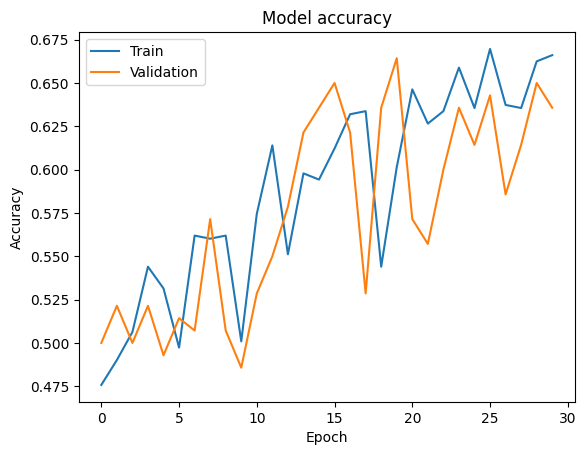

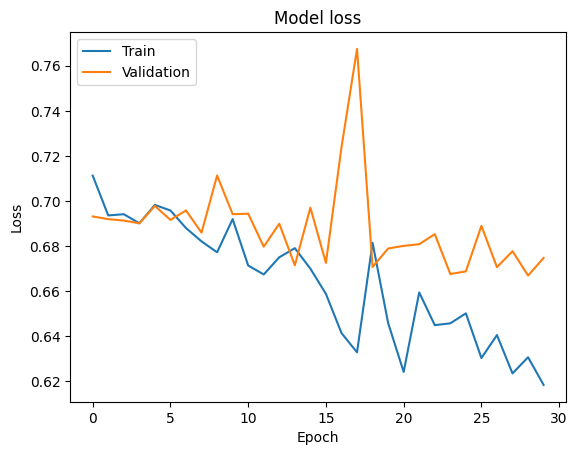

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model.save('cats_vs_dogs_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from google.colab import files

files.download('cats_vs_dogs_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model = load_model('cats_vs_dogs_model.h5')

img_path = '/content/dog.jpg'
img = image.load_img(img_path, target_size=(100, 100))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.

prediction = model.predict(img_array)
if prediction[0] > 0.5:
    print("It's a dog!")
else:
    print("It's a cat!")

1/1 [==============================] - 0s 133ms/step
It's a dog!


In [ ]:
img_path = '/content/cat.jpg'
img = image.load_img(img_path, target_size=(100, 100))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.

prediction = model.predict(img_array)
if prediction[0] > 0.5:
    print("It's a dog!")
else:
    print("It's a cat!")

1/1 [==============================] - 0s 24ms/step
It's a cat!
